In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/PrimeTrade/final_dataset.csv")

In [4]:
df['date'] = pd.to_datetime(df['date'])


df['Win'] = (df['Closed PnL'] > 0).astype(int)

In [5]:
features_to_use = ['value', 'Size USD', 'Coin', 'Side', 'Direction']
target_variable = 'Win'

In [6]:
X = df[features_to_use]
y = df[target_variable]

In [7]:
X_encoded = pd.get_dummies(X, columns=['Coin', 'Side', 'Direction'], drop_first=True)

In [8]:
print(f"Original number of features: {len(X.columns)}")
print(f"Number of features after one-hot encoding: {len(X_encoded.columns)}")

Original number of features: 5
Number of features after one-hot encoding: 180


In [9]:
print(X_encoded.head())

   value  Size USD  Coin_@10  Coin_@103  Coin_@107  Coin_@11  Coin_@113  \
0     70   7872.16     False      False       True     False      False   
1     70    127.68     False      False       True     False      False   
2     70   1150.63     False      False       True     False      False   
3     70   1142.04     False      False       True     False      False   
4     70     69.75     False      False       True     False      False   

   Coin_@13  Coin_@14  Coin_@142  ...  Coin_kSHIB  Side_SELL  \
0     False     False      False  ...       False      False   
1     False     False      False  ...       False      False   
2     False     False      False  ...       False      False   
3     False     False      False  ...       False      False   
4     False     False      False  ...       False      False   

   Direction_Close Long  Direction_Close Short  Direction_Long > Short  \
0                 False                  False                   False   
1               

In [10]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y
)



print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

--- Data Splitting Complete ---
Shape of training features (X_train): (28691, 180)
Shape of testing features (X_test): (7173, 180)
Shape of training target (y_train): (28691,)
Shape of testing target (y_test): (7173,)


In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import time


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

results = []


for name, model in models.items():
    print(f"--- Training {name}... ---")
    start_time = time.time()


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    end_time = time.time()


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    print(f"\n--- Evaluation Report for {name} ---")
    print(f"Training Time: {(end_time - start_time):.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60 + "\n")


    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Time (s)": end_time - start_time
    })


results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

print("--- Final Model Comparison Summary ---")
print(results_df)

--- Training Logistic Regression... ---

--- Evaluation Report for Logistic Regression ---
Training Time: 13.33 seconds
Accuracy: 0.9269
F1-Score: 0.9211

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4099
           1       0.86      1.00      0.92      3074

    accuracy                           0.93      7173
   macro avg       0.93      0.94      0.93      7173
weighted avg       0.94      0.93      0.93      7173


--- Training Decision Tree... ---

--- Evaluation Report for Decision Tree ---
Training Time: 0.26 seconds
Accuracy: 0.9495
F1-Score: 0.9411

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4099
           1       0.94      0.94      0.94      3074

    accuracy                           0.95      7173
   macro avg       0.95      0.95      0.95      7173
weighted avg       0.95      0.95      0.95      7173


-

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:11:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Evaluation Report for XGBoost ---
Training Time: 3.55 seconds
Accuracy: 0.9501
F1-Score: 0.9446

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4099
           1       0.90      0.99      0.94      3074

    accuracy                           0.95      7173
   macro avg       0.95      0.96      0.95      7173
weighted avg       0.95      0.95      0.95      7173


--- Final Model Comparison Summary ---
                    Model  Accuracy  F1-Score    Time (s)
0                 XGBoost  0.950091  0.944565    3.553575
1           Random Forest  0.950788  0.942797    3.135879
2           Decision Tree  0.949533  0.941138    0.264026
3       Gradient Boosting  0.938241  0.932003    9.386914
4     Logistic Regression  0.926948  0.921108   13.334961
5     K-Nearest Neighbors  0.705841  0.643581    3.653442
6  Support Vector Machine  0.571727  0.007111  217.234435


**hypere prarameter tuning**

--- Starting Hyperparameter Tuning for XGBoost... ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:20:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Tuning Complete ---
Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

--- Evaluating the TUNED Model ---
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4099
           1       0.90      0.99      0.94      3074

    accuracy                           0.95      7173
   macro avg       0.95      0.95      0.95      7173
weighted avg       0.95      0.95      0.95      7173


--- Analyzing Feature Importances ---
                            Feature  Importance
175             Direction_Open Long    0.349731
176            Direction_Open Short    0.192990
173           Direction_Close Short    0.180413
171                       Side_SELL    0.054047
78                         Coin_ETH    0.024083
136                          Coin_S    0.021958
21                          Coin_@4    0.011421
154                      Coin_USUAL    0.007739
0                             value    0.006567
4         

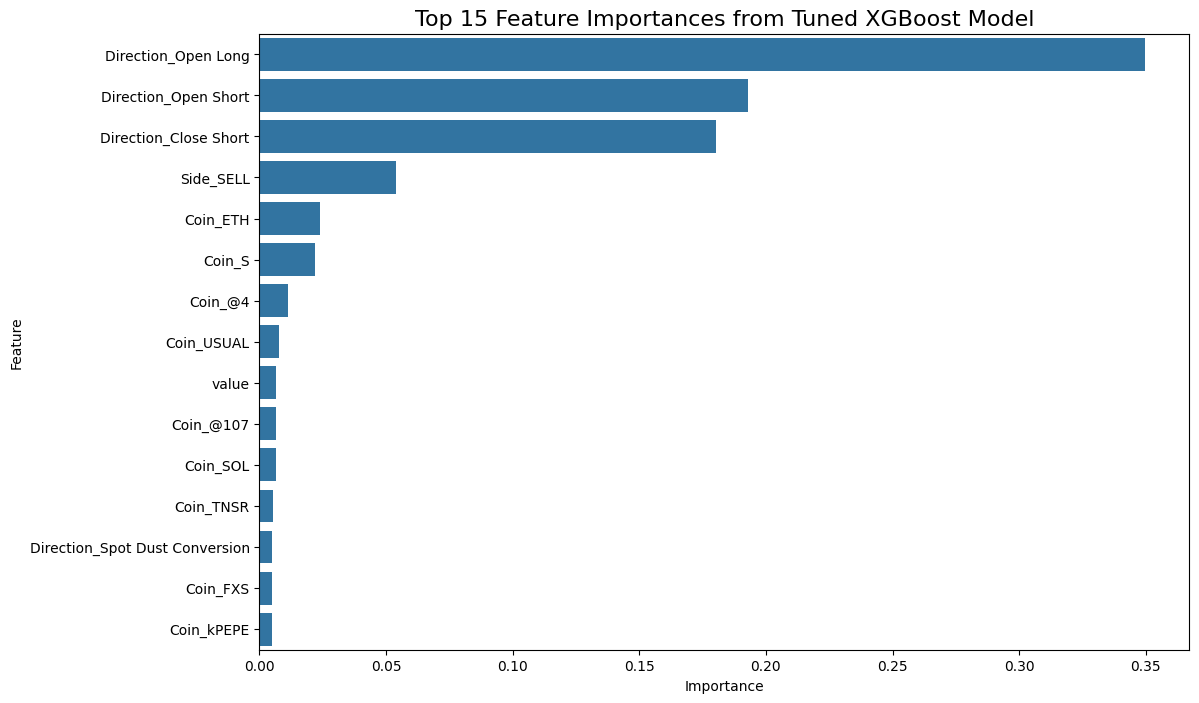

In [12]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1]
}


grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

# Get the best model found by the grid search
best_xgb_model = grid_search.best_estimator_

print("\n--- Tuning Complete ---")
print(f"Best Parameters Found: {grid_search.best_params_}")


# Evaluate the Tuned Model ---
print("\n--- Evaluating the TUNED Model ---")
y_pred_tuned = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned))


# Analyze Feature Importances ---
print("\n--- Analyzing Feature Importances ---")
importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


print(importances.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances.head(15))
plt.title('Top 15 Feature Importances from Tuned XGBoost Model', fontsize=16)
plt.show()